# Análisis de datos sobre Accidentes Laborales en España
Proyecto enfocado en el análisis de datos sobre los accidentes laborales en España entre 2019 y 2023.

**Autor:** Asier Beltrán Puga - **Fecha:** Noviembre 2024

---

### ⭐ Hipótesis principal del proyecto:
Los accidentes laborales están altamente influenciados por:
- El sector económico.
- Grupos de edad específicos.
- El tipo de tarea realizada, con sectores como la construcción siendo más propensos.

---

### ⭐⭐ Hipótesis secundarias:
1. **Patrones geográficos**:
   Los accidentes están concentrados en provincias con alta actividad económica y sectores industriales relevantes, como Valencia, Alicante y Castellón.

2. **Factores demográficos**:
   - Los trabajadores jóvenes y en edades medias (25-44 años) son los más afectados.
   - Los hombres tienen mayor proporción de accidentes graves en comparación con las mujeres.

3. **Predicción por tipo de sector**:
   Los sectores con más riesgo incluyen:
   - Construcción.
   - Industria manufacturera.
   - Transporte y almacenamiento.

4. **Impacto de la prevención**:
   Implementar medidas de seguridad específicas para actividades críticas (manejo de cargas pesadas, ergonomía) podría reducir significativamente las lesiones más comunes, como caídas y sobreesfuerzos.

5. **Concentración de gravedad**:
   Accidentes graves y mortales están más asociados con actividades en la construcción y el transporte.

---

### 🔎 Objetivos del proyecto:
- Identificar los factores clave detrás de los accidentes laborales.
- Proponer estrategias de prevención basadas en datos.
- Destacar patrones temporales y geográficos de interés.

---

### Gráficas y Resumen de Datos:
**Distribución temporal, factores demográficos, y tipos de lesiones más comunes están detallados en este análisis.**



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import IFrame
from shapely.geometry import Point

In [4]:
cv_2023 = pd.read_csv('data/cv_2023.csv', sep = ';')
cv_2022 = pd.read_csv('data/cv_2022.csv', sep = ';')
cv_2021 = pd.read_csv('data/cv_2021.csv', sep = ';')
cv_2020 = pd.read_csv('data/cv_2020.csv', sep = ';')
cv_2019 = pd.read_csv('data/cv_2019.csv', sep = ';')

In [6]:
cv_total = pd.concat([cv_2023, cv_2022, cv_2021, cv_2020, cv_2019], axis=0, ignore_index=True)
cv_total.head(10)

,ANYO,SEXO,TIPO_DE_ACCIDENTE,LUGAR,PROVINCIA,GRAVEDAD,FORMA_LESIÓN,CNAE_SECTOR,CNAE_SECCIÓN,CNAE_DIVISIÓN,RANGO_EDAD
0,2023,H,Resto Traumáticos,Accidentes en Jornada de Trabajo,Valencia/València,Leve,Ahogamiento en un Líquido,Construcción,Construcción,Actividades de construcción especializada,35-39
1,2023,H,Resto Traumáticos,Accidentes en Jornada de Trabajo,Alicante/Alacant,Leve,Ahogamiento en un Líquido,Construcción,Construcción,Actividades de construcción especializada,40-44
2,2023,H,Resto Traumáticos,Accidentes en Jornada de Trabajo,Valencia/València,Leve,Ahogamiento en un Líquido,Servicios,Administración Pública y defensa; Seguridad So...,Administración Pública y defensa; Seguridad So...,60-64
3,2023,H,Resto Traumáticos,Accidentes en Jornada de Trabajo,Valencia/València,Leve,Ahogamiento en un Líquido,Industria,Industria manufacturera,Fabricación de productos de caucho y plásticos,35-39
4,2023,H,Resto Traumáticos,Accidentes en Jornada de Trabajo,Valencia/València,Grave y Muy Grave,"Amputación, Seccionamiento de un Miembro, una ...",Servicios,Actividades sanitarias y de servicios sociales,Actividades de servicios sociales sin alojamiento,20-24
5,2023,H,Resto Traumáticos,Accidentes en Jornada de Trabajo,Valencia/València,Grave y Muy Grave,"Amputación, Seccionamiento de un Miembro, una ...",Servicios,Comercio al por mayor y al por menor; reparaci...,Comercio al por mayor e intermediarios del com...,50-54
6,2023,H,Resto Traumáticos,Accidentes en Jornada de Trabajo,Castellón/Castelló,Grave y Muy Grave,"Amputación, Seccionamiento de un Miembro, una ...",Servicios,Comercio al por mayor y al por menor; reparaci...,"Comercio al por menor, excepto de vehículos de...",35-39
7,2023,H,Resto Traumáticos,Accidentes en Jornada de Trabajo,Alicante/Alacant,Grave y Muy Grave,"Amputación, Seccionamiento de un Miembro, una ...",Construcción,Construcción,Construcción de edificios,25-29
8,2023,H,Resto Traumáticos,Accidentes en Jornada de Trabajo,Alicante/Alacant,Grave y Muy Grave,"Amputación, Seccionamiento de un Miembro, una ...",Industria,Industria manufacturera,Industria de la alimentación,25-29
9,2023,H,Resto Traumáticos,Accidentes en Jornada de Trabajo,Valencia/València,Leve,"Amputación, Seccionamiento de un Miembro, una ...",Construcción,Construcción,Actividades de construcción especializada,20-24


In [5]:
cv_total.dtypes

ANYO                  int64
SEXO                 object
TIPO_DE_ACCIDENTE    object
LUGAR                object
PROVINCIA            object
GRAVEDAD             object
FORMA_LESIÓN         object
CNAE_SECTOR          object
CNAE_SECCIÓN         object
CNAE_DIVISIÓN        object
RANGO_EDAD           object
dtype: object

In [6]:
cv_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300064 entries, 0 to 300063
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ANYO               300064 non-null  int64 
 1   SEXO               300064 non-null  object
 2   TIPO_DE_ACCIDENTE  300064 non-null  object
 3   LUGAR              300064 non-null  object
 4   PROVINCIA          300064 non-null  object
 5   GRAVEDAD           300064 non-null  object
 6   FORMA_LESIÓN       300064 non-null  object
 7   CNAE_SECTOR        300064 non-null  object
 8   CNAE_SECCIÓN       300064 non-null  object
 9   CNAE_DIVISIÓN      300064 non-null  object
 10  RANGO_EDAD         300064 non-null  object
dtypes: int64(1), object(10)
memory usage: 25.2+ MB


<h1>Analisis descriptivo
<H2>Distribución general

<h1>Gráfico 1 (Accidentes por año)

In [7]:
# Contar el número de accidentes laborales por año
accidentes_anyo = cv_total.groupby("ANYO").size().sort_values(ascending=False)

# Obtener el año con más accidentes
anyo_mas_accidentes = accidentes_anyo.idxmax()
contar_accidentes = accidentes_anyo.max()

# Mostrar los resultados
print("Accidentes por año:")
print(accidentes_anyo)
print(f"\nEl año con más bajas laborales fue {anyo_mas_accidentes} con un total de {contar_accidentes} accidentes.")

Accidentes por año:
ANYO
2023    63597
2022    63502
2019    61280
2021    59938
2020    51747
dtype: int64

El año con más bajas laborales fue 2023 con un total de 63597 accidentes.


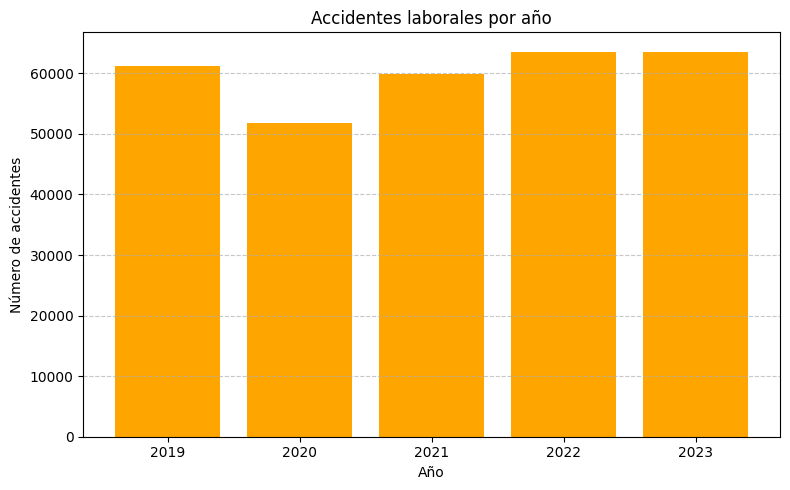

In [8]:
# Crear gráfico de barras usando la variable accidents_by_year
plt.figure(figsize=(8, 5))
plt.bar(accidentes_anyo.index, accidentes_anyo.values, color="orange")
plt.title("Accidentes laborales por año")
plt.xlabel("Año")
plt.ylabel("Número de accidentes")
plt.xticks(accidentes_anyo.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h1>Gráfico 2 (Accidentes por provincia)

In [9]:
# Agrupar los datos por año y provincia, luego contar los accidentes
accidentes_anyo_provincia = cv_total.groupby(['ANYO', 'PROVINCIA']).size().reset_index(name='TOTAL_ACCIDENTES')

# Ordenar los resultados por año y luego por el total de accidentes en orden descendente dentro de cada año
accidentes_anyo_provincia = accidentes_anyo_provincia.sort_values(by=['ANYO', 'TOTAL_ACCIDENTES'], ascending=[True, False])

# Mostrar los resultados
accidentes_anyo_provincia.reset_index(drop=True)

,ANYO,PROVINCIA,TOTAL_ACCIDENTES
0,2019,Valencia/València,33148
1,2019,Alicante/Alacant,19649
2,2019,Castellón/Castelló,8483
3,2020,Valencia/València,28940
4,2020,Alicante/Alacant,15606
5,2020,Castellón/Castelló,7201
6,2021,Valencia/València,33162
7,2021,Alicante/Alacant,18056
8,2021,Castellón/Castelló,8720
9,2022,Valencia/València,34704


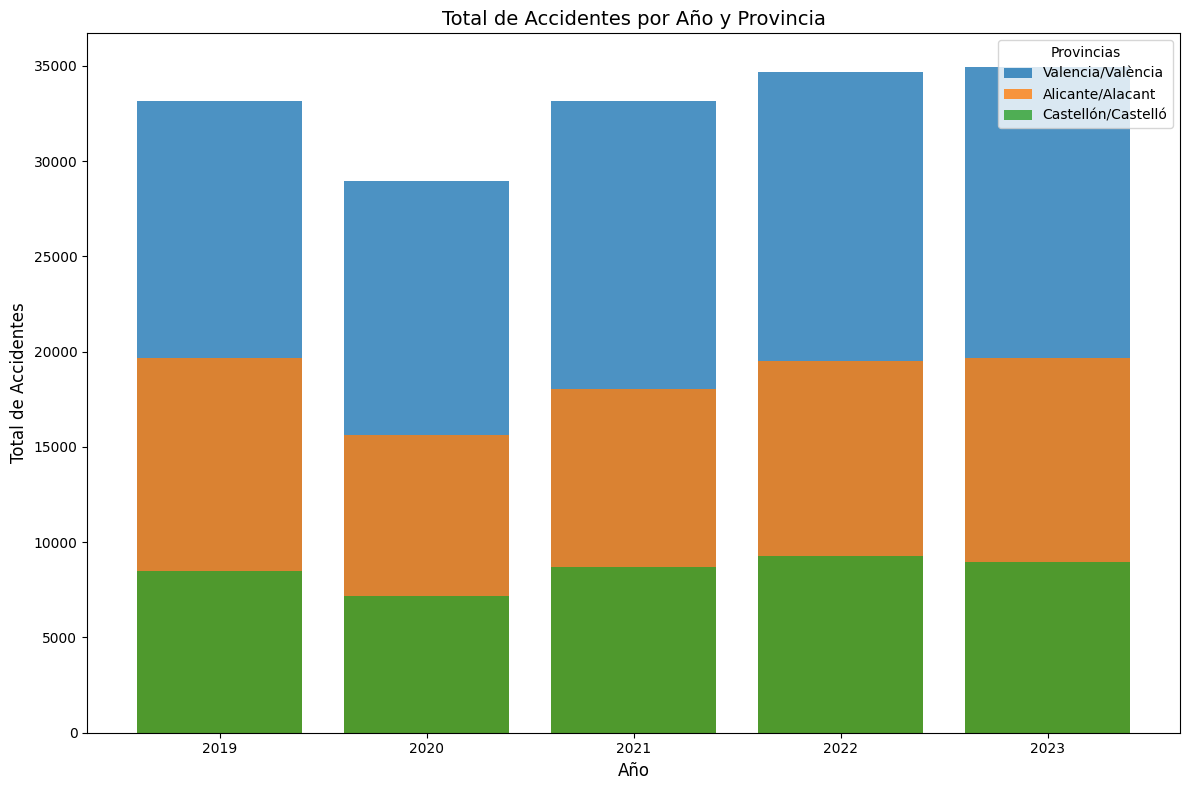

In [10]:
# Crear una gráfica para los accidentes por año y provincia
plt.figure(figsize=(12, 8))

# Generar una barra apilada
for provincia in accidentes_anyo_provincia['PROVINCIA'].unique():
    data = accidentes_anyo_provincia[accidentes_anyo_provincia['PROVINCIA'] == provincia]
    plt.bar(data['ANYO'], data['TOTAL_ACCIDENTES'], label=provincia, alpha=0.8)

# Configuración de la gráfica
plt.title('Total de Accidentes por Año y Provincia', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Accidentes', fontsize=12)
plt.xticks(accidentes_anyo_provincia['ANYO'].unique())
plt.legend(title='Provincias')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

<h1>Gráfico 3 (Accidentes por sector)

In [11]:
# Agrupar por AÑO y CNAE_SECTOR para contar las bajas
bajas_por_sector = cv_total.groupby(['ANYO', 'CNAE_SECTOR']).size().reset_index(name='TOTAL_BAJAS')

# Mostrar el resultado
bajas_por_sector

,ANYO,CNAE_SECTOR,TOTAL_BAJAS
0,2019,Agricultura,3880
1,2019,Construcción,8151
2,2019,Industria,11710
3,2019,Servicios,37539
4,2020,Agricultura,3386
5,2020,Construcción,7183
6,2020,Industria,10280
7,2020,Servicios,30898
8,2021,Agricultura,3264
9,2021,Construcción,8399


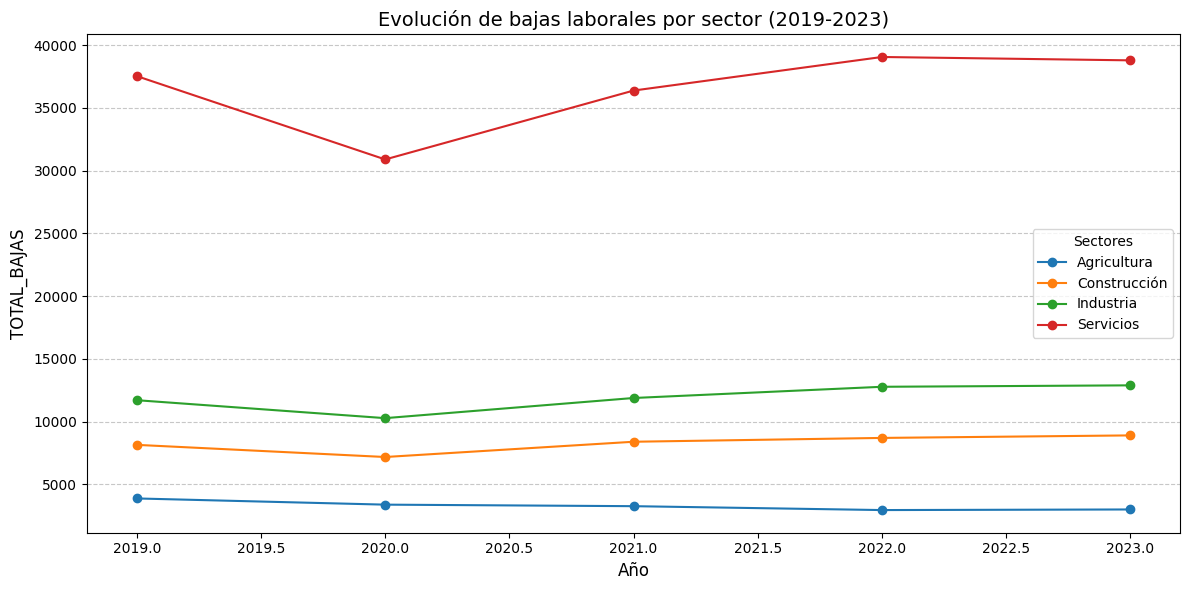

In [12]:
# Crear un gráfico de líneas agrupadas por año y sector
fig, ax = plt.subplots(figsize=(12, 6))

for sector in bajas_por_sector['CNAE_SECTOR'].unique():
    sector_data = bajas_por_sector[bajas_por_sector['CNAE_SECTOR'] == sector]
    ax.plot(sector_data['ANYO'], sector_data['TOTAL_BAJAS'], marker='o', label=sector)

# Etiquetas y leyenda
ax.set_title("Evolución de bajas laborales por sector (2019-2023)", fontsize=14)
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("TOTAL_BAJAS", fontsize=12)
ax.legend(title="Sectores", fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.tight_layout()
plt.show()

<h1>Gráfico 4 (Combinaciones comunes entre tipo de accidente y gravedad)

In [13]:
# Agrupar los datos por año, tipo de accidente y gravedad, y contar las combinaciones
combinaciones_comunes_anyo = cv_total.groupby(['ANYO', 'TIPO_DE_ACCIDENTE', 'GRAVEDAD']).size().reset_index(name='TOTAL')

# Ordenar por año y luego por las combinaciones más frecuentes
combinaciones_comunes_anyo = combinaciones_comunes_anyo.sort_values(by=['ANYO', 'TOTAL'], ascending=[True, False])

# Mostrar los resultados
combinaciones_comunes_anyo

,ANYO,TIPO_DE_ACCIDENTE,GRAVEDAD,TOTAL
4,2019,Resto Traumáticos,Leve,53557
7,2019,Tráfico,Leve,7015
3,2019,Resto Traumáticos,Grave y Muy Grave,396
6,2019,Tráfico,Grave y Muy Grave,130
1,2019,No Traumáticos,Leve,61
5,2019,Resto Traumáticos,Mortal,36
0,2019,No Traumáticos,Grave y Muy Grave,30
8,2019,Tráfico,Mortal,29
2,2019,No Traumáticos,Mortal,26
13,2020,Resto Traumáticos,Leve,45842


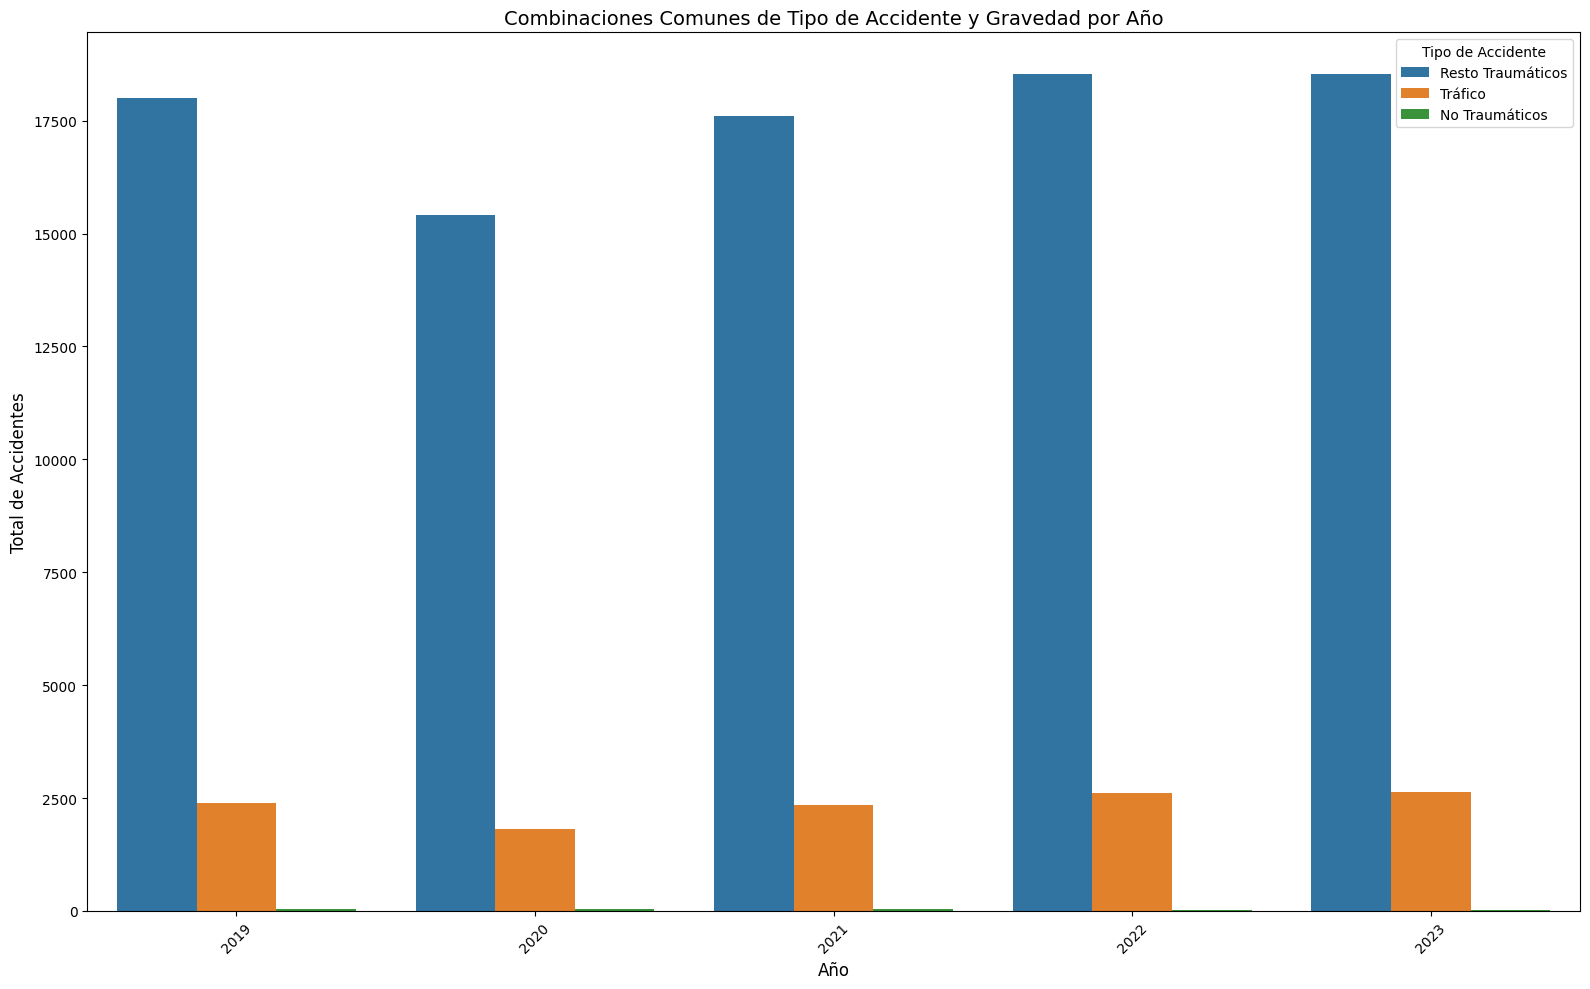

In [14]:
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear un gráfico de barras
sns.barplot(
    data=combinaciones_comunes_anyo,
    x='ANYO',
    y='TOTAL',
    hue='TIPO_DE_ACCIDENTE',
    errorbar=None
)

# Configurar el título y las etiquetas
plt.title('Combinaciones Comunes de Tipo de Accidente y Gravedad por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Accidentes', fontsize=12)
plt.legend(title='Tipo de Accidente', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h2>Tendencia por caracteristicas demográficas

<h1>Gráfico 5 (Grupo de edad y sexo mas vulnerable por año)

In [15]:
# Agrupar por año y rango de edad, contando los accidentes
grupo_edad_vulnerable = cv_total.groupby(["ANYO", "RANGO_EDAD", "SEXO"]).size().reset_index(name="COUNT")

grupo_edad_vulnerable

,ANYO,RANGO_EDAD,SEXO,COUNT
0,2019,18-19,H,590
1,2019,18-19,M,222
2,2019,20-24,H,2875
3,2019,20-24,M,1246
4,2019,25-29,H,3938
...,...,...,...,...
115,2023,60-64,M,1380
116,2023,65<,H,231
117,2023,65<,M,179
118,2023,<18,H,98


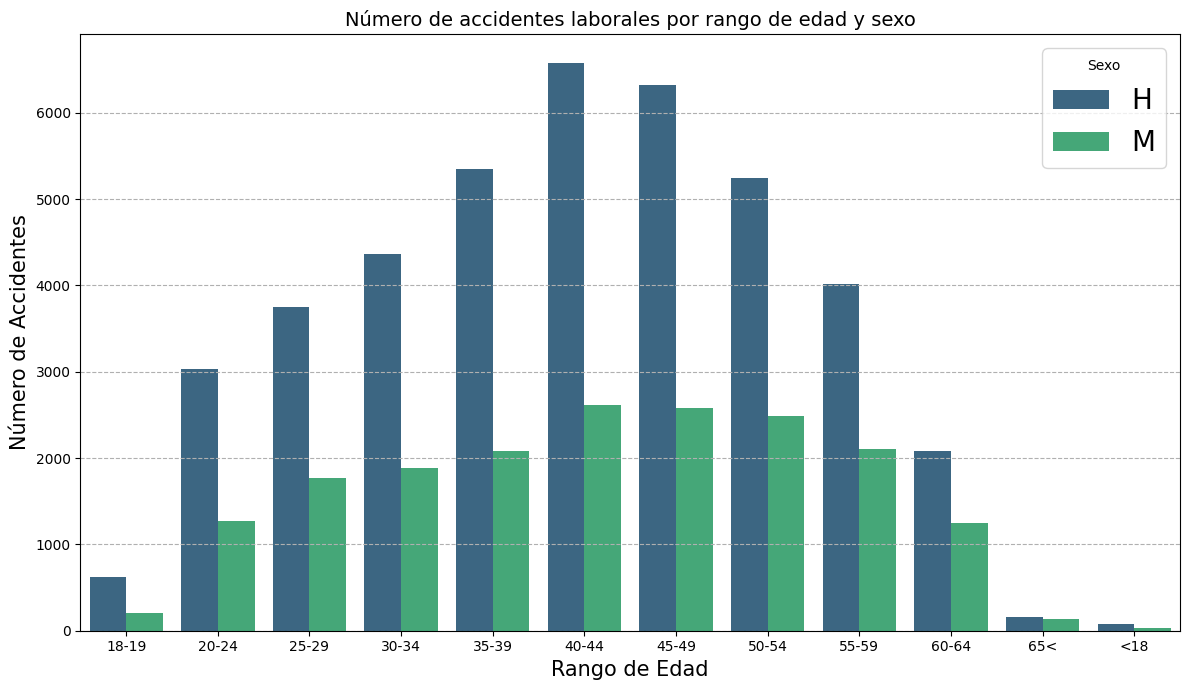

In [16]:
# Crear un gráfico de barras agrupado por año y sexo
plt.figure(figsize=(12, 7))
sns.barplot(
    data=grupo_edad_vulnerable, 
    x="RANGO_EDAD", 
    y="COUNT", 
    hue="SEXO", 
    errorbar=None, 
    palette="viridis"
)

# Configuración del gráfico
plt.title("Número de accidentes laborales por rango de edad y sexo", fontsize=14)
plt.xlabel("Rango de Edad", fontsize=15)
plt.ylabel("Número de Accidentes", fontsize=15)
plt.legend(title="Sexo", fontsize=20, loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=1)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h1>Gráfico 6 (Diferencia entre H/M en tipo de accidente)

In [17]:
# Agrupar los datos por año, sexo y tipo de accidente para comparar diferencias
diferencia_genero_accidente = cv_total.groupby(["ANYO", "SEXO", "TIPO_DE_ACCIDENTE"]).size().reset_index(name="COUNT")

# Calcular las proporciones por sexo dentro de cada año
total_genero_anyo = diferencia_genero_accidente.groupby(['ANYO', 'SEXO'])['COUNT'].transform('sum')
diferencia_genero_accidente['PERCENTAGE'] = (diferencia_genero_accidente['COUNT'] / total_genero_anyo) * 100

# Mostrar los resultados
diferencia_genero_accidente

,ANYO,SEXO,TIPO_DE_ACCIDENTE,COUNT,PERCENTAGE
0,2019,H,No Traumáticos,90,0.210709
1,2019,H,Resto Traumáticos,38166,89.354529
2,2019,H,Tráfico,4457,10.434762
3,2019,M,No Traumáticos,27,0.145419
4,2019,M,Resto Traumáticos,15823,85.221091
5,2019,M,Tráfico,2717,14.633490
6,2020,H,No Traumáticos,75,0.207722
7,2020,H,Resto Traumáticos,32687,90.530660
8,2020,H,Tráfico,3344,9.261619
9,2020,M,No Traumáticos,30,0.191804


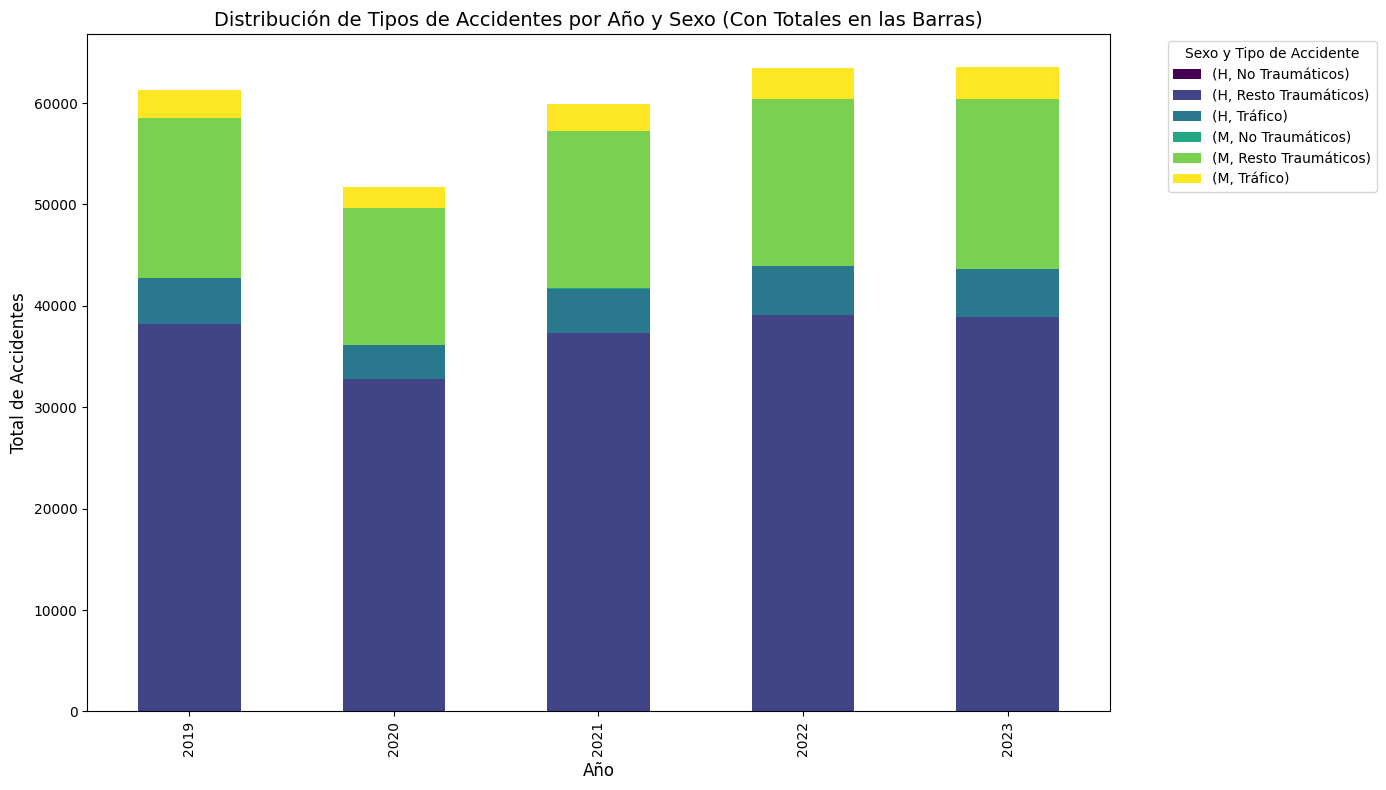

In [18]:
# Crear un DataFrame pivotado para las barras apiladas usando el total
pivot_total = diferencia_genero_accidente.pivot_table(
    index="ANYO",
    columns=["SEXO", "TIPO_DE_ACCIDENTE"],
    values="COUNT",
    fill_value=0
)

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(14, 8))
pivot_total.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="viridis", ax=ax)

# Configuración del gráfico
plt.title("Distribución de Tipos de Accidentes por Año y Sexo (Con Totales en las Barras)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Total de Accidentes", fontsize=12)
plt.legend(title="Sexo y Tipo de Accidente", fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h1>Identificación de patrones y relaciones
<h2>Sectores y trabajos peligrosos

<h1>Gráfico 7 (Sección con mas accidentes)

In [19]:
# Agrupar los datos por CNAE_SECCIÓN y contar los accidentes
accidentes_seccion = cv_total.groupby(["ANYO", "CNAE_SECCIÓN"]).size().reset_index(name="TOTAL")

# Ordenar por la cantidad de accidentes en orden descendente
accidentes_seccion = accidentes_seccion.sort_values(by="ANYO", ascending=False)

# Mostrar los resultados
accidentes_seccion.reset_index(drop = True)

,ANYO,CNAE_SECCIÓN,TOTAL
0,2023,Transporte y almacenamiento,4414
1,2023,Comercio al por mayor y al por menor; reparaci...,9914
2,2023,Actividades administrativas y servicios auxliares,6493
3,2023,"Actividades artísticas, recreativas y de entre...",1210
4,2023,Actividades de los hogares como empleadores de...,242
...,...,...,...
100,2019,Otros servicios,981
101,2019,"Suministro de agua, actividades de saneamiento...",1060
102,2019,"Suministro de energía eléctrica, gas, vapor y ...",44
103,2019,Transporte y almacenamiento,4316


<Figure size 10000x2000 with 0 Axes>

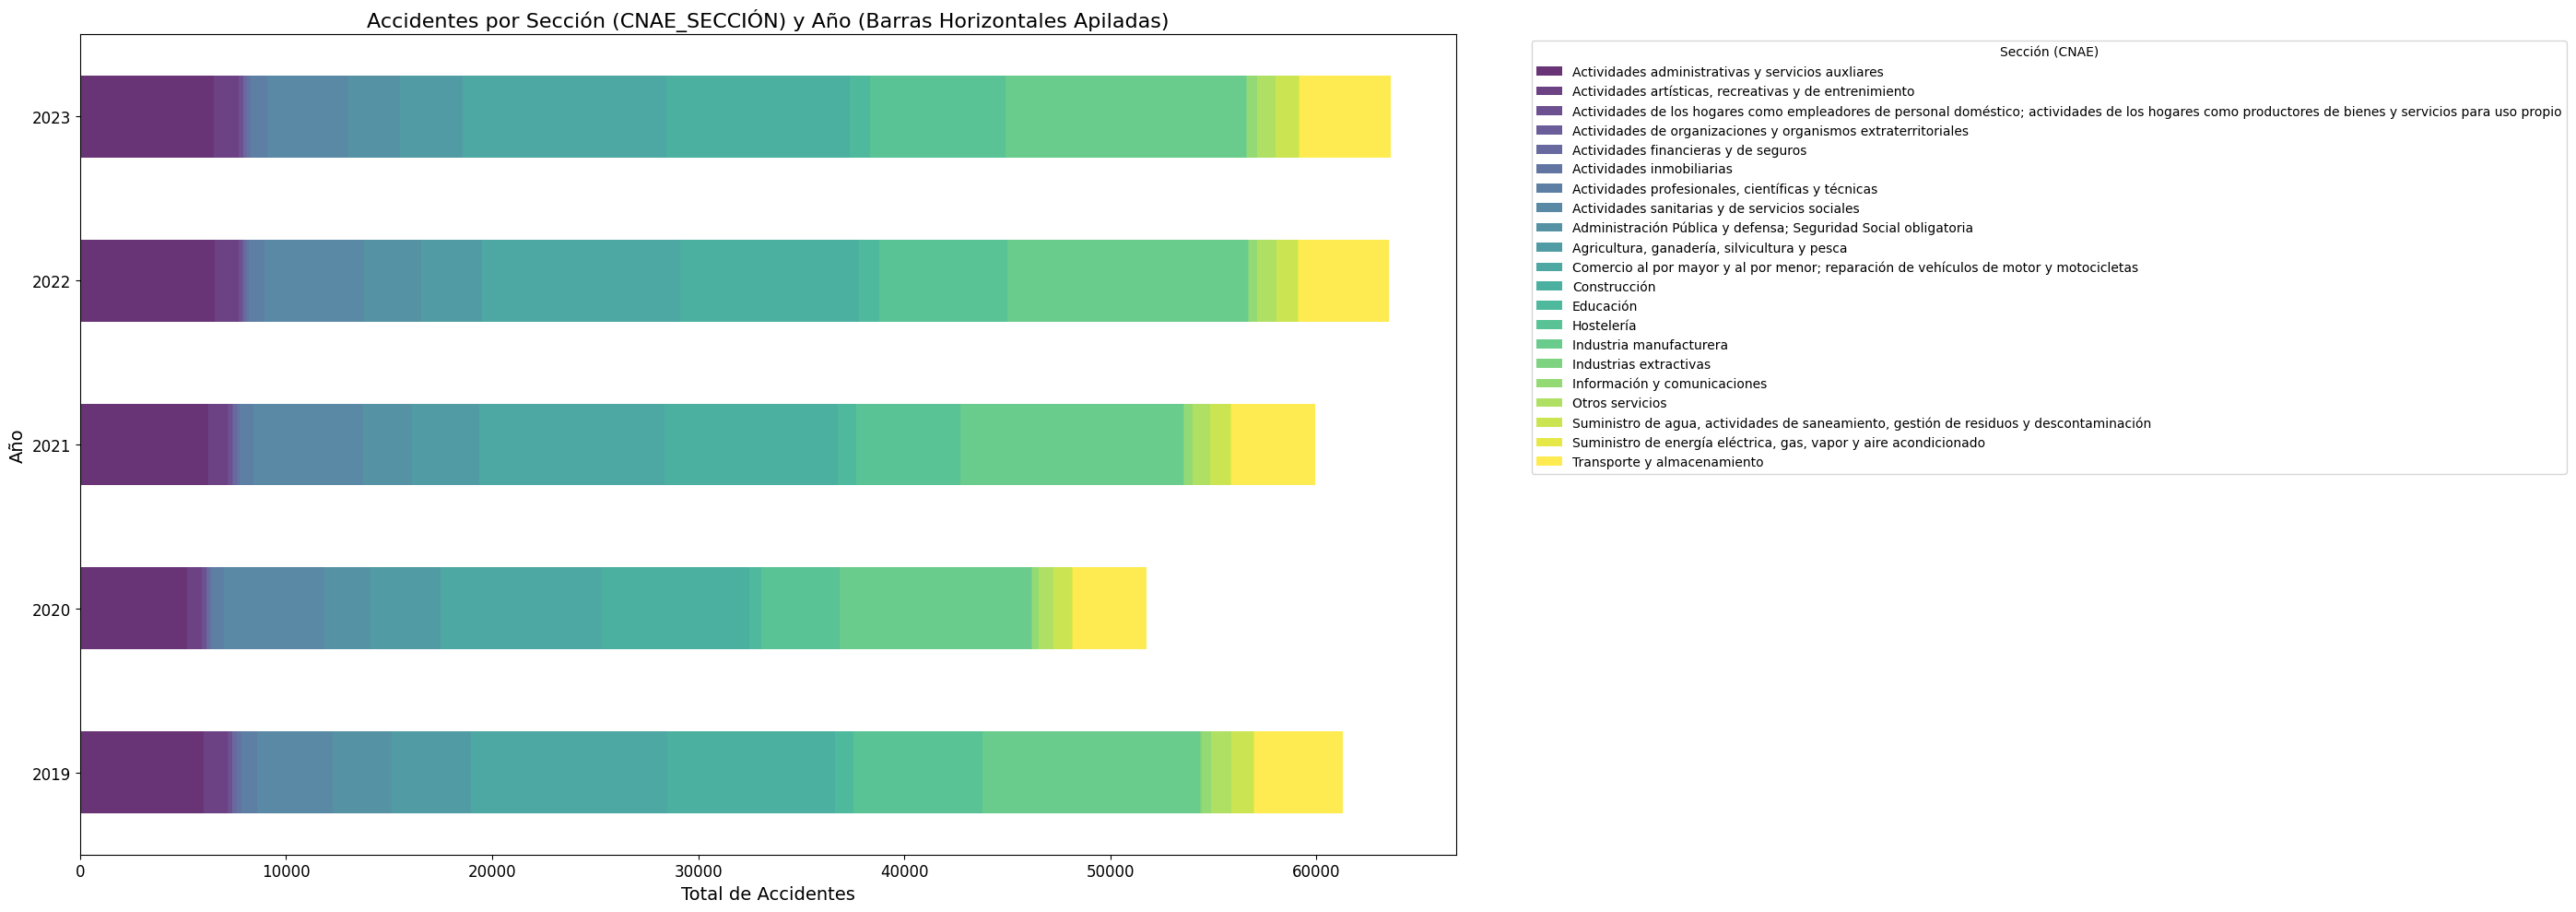

In [20]:
# Crear una tabla dinámica (pivot table) para preparar los datos
accidentes_seccion_pivot = accidentes_seccion.pivot_table(
    index="ANYO", 
    columns="CNAE_SECCIÓN", 
    values="TOTAL", 
    aggfunc="sum", 
    fill_value=0
)
# Crear un gráfico de barras horizontales apiladas para visualizar accidentes por sección y año
plt.figure(figsize=(100, 20))

# Crear el gráfico de barras horizontales apiladas
accidentes_seccion_pivot.plot(kind="barh", stacked=True, figsize=(16, 10), colormap="viridis", alpha=0.8, legend=False)

# Configuración del gráfico
plt.title("Accidentes por Sección (CNAE_SECCIÓN) y Año (Barras Horizontales Apiladas)", fontsize=16)
plt.xlabel("Total de Accidentes", fontsize=14)
plt.ylabel("Año", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Crear una leyenda personalizada fuera del gráfico
plt.legend(
    labels=accidentes_seccion_pivot.columns,
    title="Sección (CNAE)",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=10
)

# Mostrar el gráfico
plt.show()

<h1>Gráfico 8 (Sección mas mortal)

In [21]:
# Filtrar los datos para seleccionar solo los accidentes mortales
mortales_por_seccion = cv_total[cv_total['GRAVEDAD'].str.contains('Mortal', na=False)]

# Agrupar por año y sección (CNAE_SECCIÓN) y contar los accidentes mortales
mortales_por_seccion_agrupado = mortales_por_seccion.groupby(['ANYO', 'CNAE_SECCIÓN']).size().reset_index(name='TOTAL_MORTALES')

# Seleccionar la sección con más accidentes mortales por año
secciones_mas_mortales = mortales_por_seccion_agrupado.loc[
    mortales_por_seccion_agrupado.groupby('ANYO')['TOTAL_MORTALES'].idxmax()
]

# Mostrar el DataFrame resultante
secciones_mas_mortales.reset_index(drop = True)

,ANYO,CNAE_SECCIÓN,TOTAL_MORTALES
0,2019,Construcción,22
1,2020,Construcción,18
2,2021,Transporte y almacenamiento,16
3,2022,Construcción,22
4,2023,Construcción,19


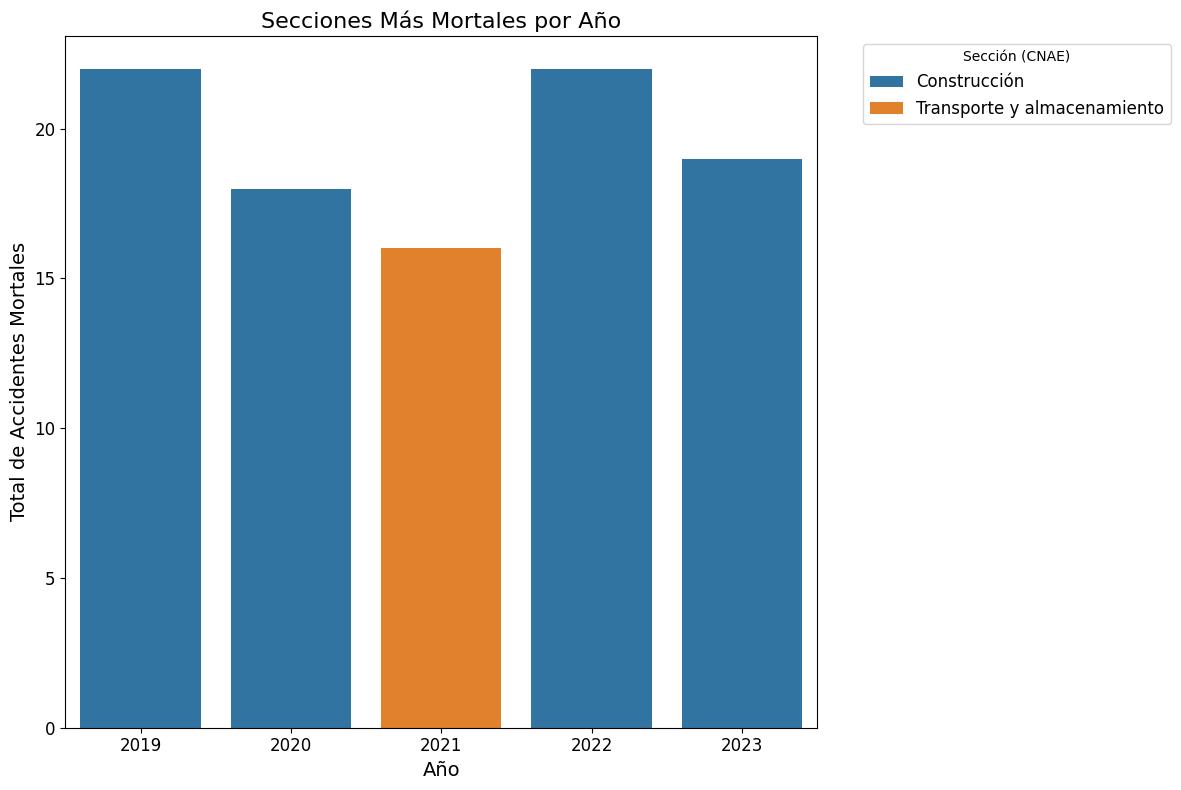

In [22]:
# Crear un gráfico de barras para visualizar las secciones más mortales por año
plt.figure(figsize=(12, 8))

# Generar el gráfico de barras
sns.barplot(
    data=secciones_mas_mortales,
    x="ANYO",
    y="TOTAL_MORTALES",
    hue="CNAE_SECCIÓN",
    dodge=False
)

# Configuración del gráfico
plt.title("Secciones Más Mortales por Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Total de Accidentes Mortales", fontsize=14)
plt.legend(title="Sección (CNAE)", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h1>Gráfico 9 (División con mas accidentes)

In [23]:
# Agrupar los datos por CNAE_DIVISION y contar los accidentes
accidentes_division = cv_total.groupby(["ANYO", "CNAE_DIVISIÓN"]).size().reset_index(name="TOTAL")

# Ordenar por la cantidad de accidentes en orden descendente
accidentes_division = accidentes_division.sort_values(by="ANYO", ascending=False)

# Mostrar los resultados
accidentes_division.reset_index(drop = True)

,ANYO,CNAE_DIVISIÓN,TOTAL
0,2023,Venta y reparación de vehículos de motor y mot...,1282
1,2023,"Captación, depuración y distribución de agua",156
2,2023,Actividades relacionadas con el empleo,2087
3,2023,Actividades sanitarias,1973
4,2023,Actividades veterinarias,41
...,...,...,...
416,2019,Metalurgia; fabricación de productos de hierro...,246
417,2019,"Otras actividades profesionales, científicas y...",184
418,2019,Otras industrias extractivas,65
419,2019,Otras industrias manufactureras,209


<Figure size 10000x2000 with 0 Axes>

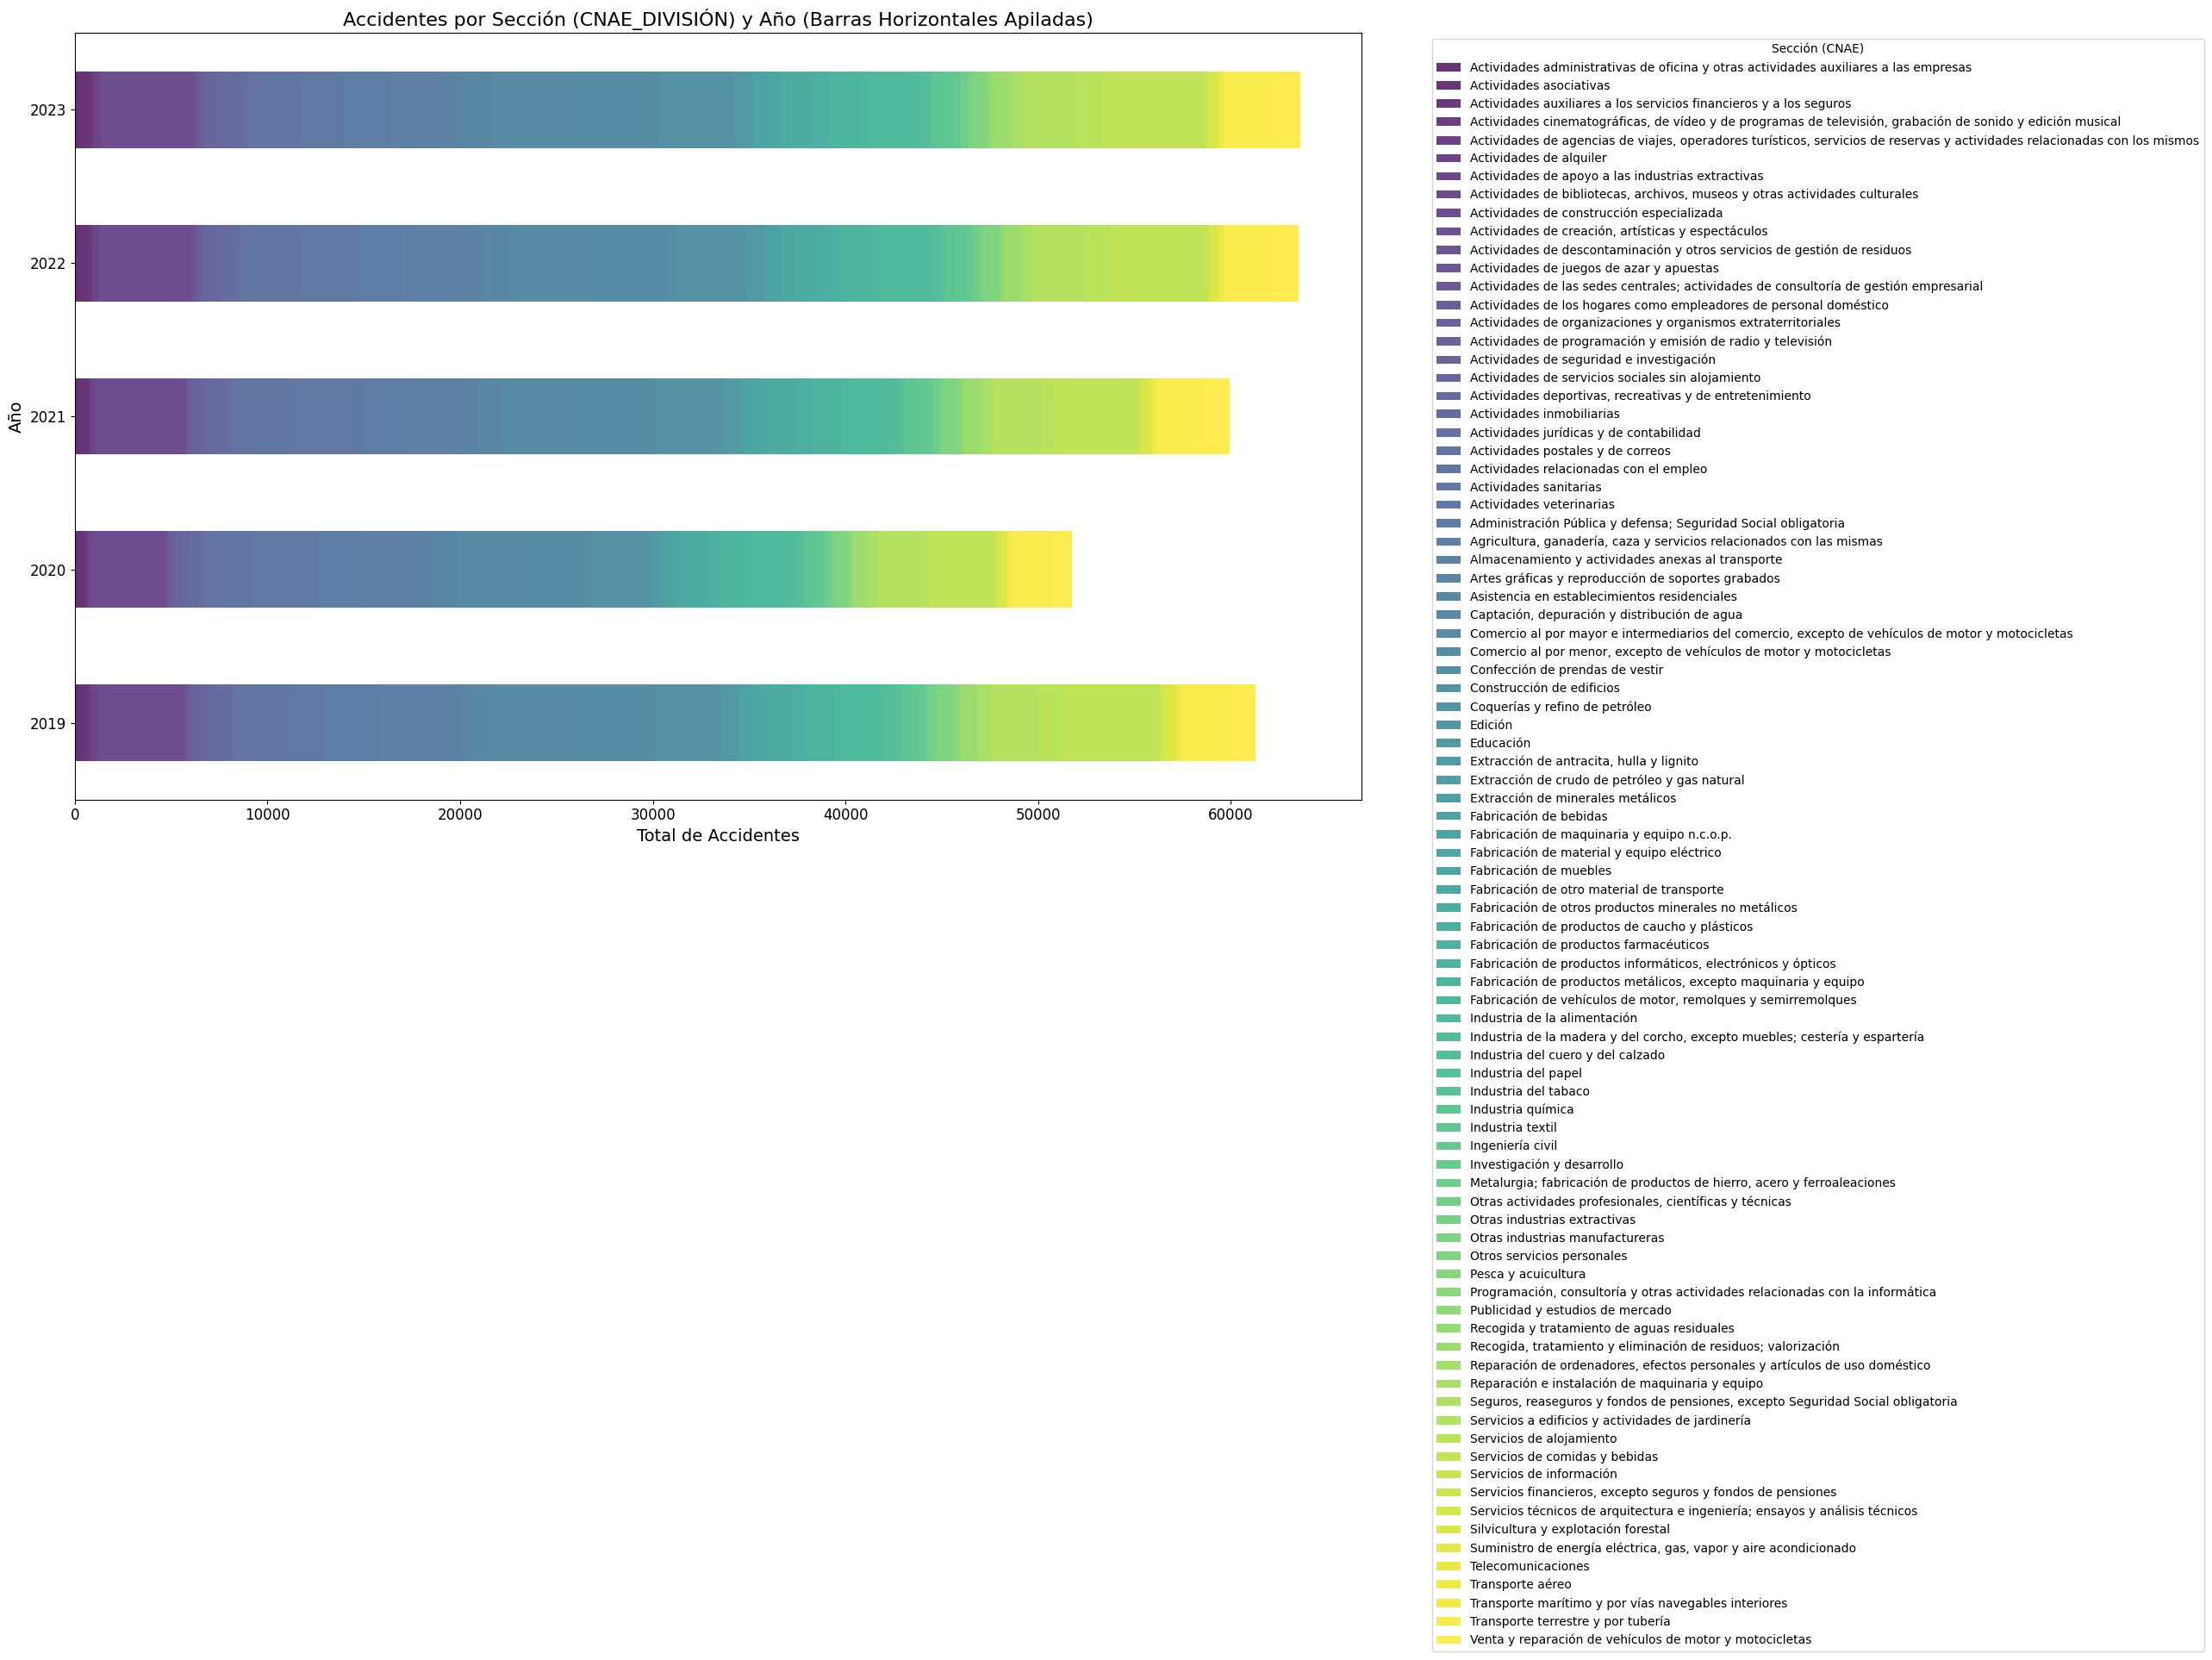

In [24]:
# Crear una tabla dinámica (pivot table) para preparar los datos
accidentes_division_pivot = accidentes_division.pivot_table(
    index="ANYO", 
    columns="CNAE_DIVISIÓN", 
    values="TOTAL", 
    aggfunc="sum", 
    fill_value=0
)
# Crear un gráfico de barras horizontales apiladas para visualizar accidentes por sección y año
plt.figure(figsize=(100, 20))

# Crear el gráfico de barras horizontales apiladas
accidentes_division_pivot.plot(kind="barh", stacked=True, figsize=(16, 10), colormap="viridis", alpha=0.8, legend=False)

# Configuración del gráfico
plt.title("Accidentes por Sección (CNAE_DIVISIÓN) y Año (Barras Horizontales Apiladas)", fontsize=16)
plt.xlabel("Total de Accidentes", fontsize=14)
plt.ylabel("Año", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Crear una leyenda personalizada fuera del gráfico
plt.legend(
    labels=accidentes_division_pivot.columns,
    title="Sección (CNAE)",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=10
)

# Mostrar el gráfico
plt.show()

<h1>Gráfico 10 (División mas mortal)

In [25]:
# Filtrar los datos para seleccionar solo los accidentes mortales
mortales_por_division = cv_total[cv_total['GRAVEDAD'].str.contains('Mortal', na=False)]

# Agrupar por año y división (CNAE_DIVISIÓN) y contar los accidentes mortales
mortales_por_division_agrupado = mortales_por_division.groupby(['ANYO', 'CNAE_DIVISIÓN']).size().reset_index(name='TOTAL_MORTALES')

# Seleccionar la división con más accidentes mortales por año
divisiones_mas_mortales = mortales_por_division_agrupado.loc[
    mortales_por_division_agrupado.groupby('ANYO')['TOTAL_MORTALES'].idxmax()
]

# Mostrar el DataFrame resultante
divisiones_mas_mortales.reset_index(drop = True)

,ANYO,CNAE_DIVISIÓN,TOTAL_MORTALES
0,2019,Transporte terrestre y por tubería,12
1,2020,Actividades de construcción especializada,10
2,2021,Transporte terrestre y por tubería,13
3,2022,Transporte terrestre y por tubería,14
4,2023,Actividades de construcción especializada,11


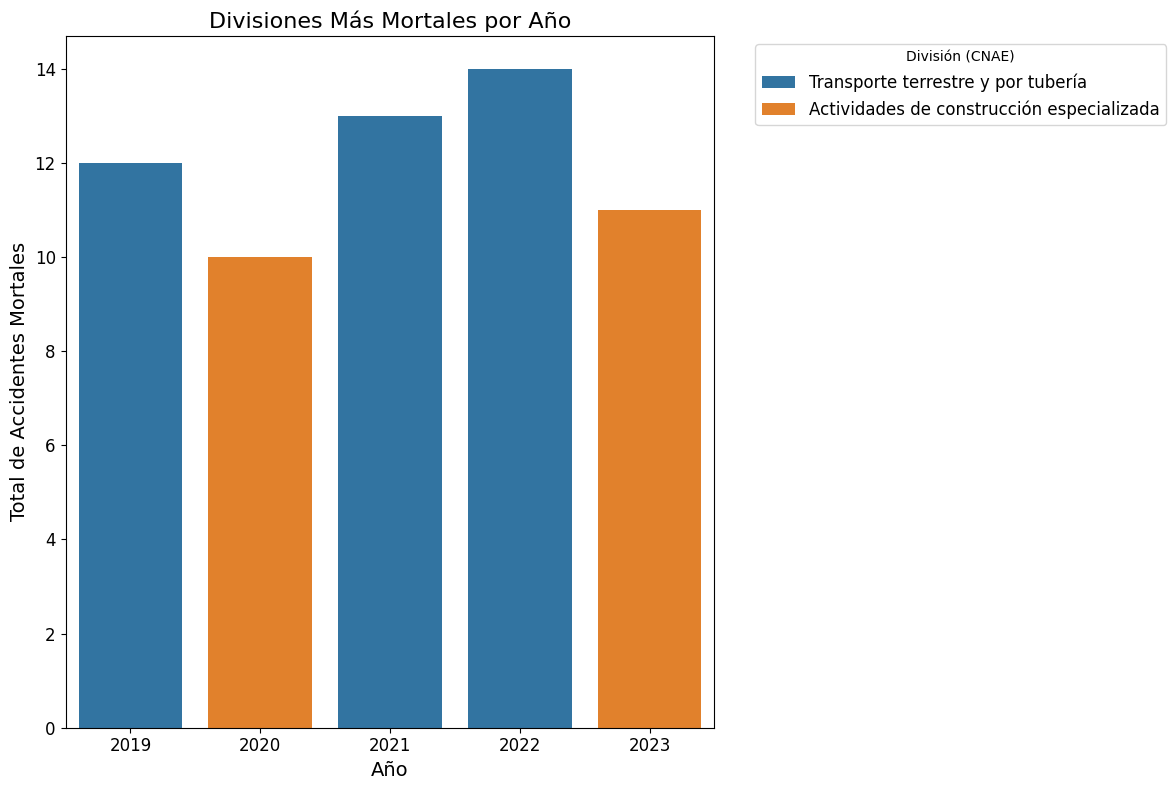

In [26]:
# Crear un gráfico de barras para visualizar las divisiones más mortales por año
plt.figure(figsize=(12, 8))

# Generar el gráfico de barras
sns.barplot(
    data=divisiones_mas_mortales,
    x="ANYO",
    y="TOTAL_MORTALES",
    hue="CNAE_DIVISIÓN",
    dodge=False
)

# Configuración del gráfico
plt.title("Divisiones Más Mortales por Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Total de Accidentes Mortales", fontsize=14)
plt.legend(title="División (CNAE)", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h2>Tipos de lesiones y causas

<h1>Gráfico 11 (Accidentes mas comunes)

In [27]:
# Agrupar los datos por año y tipo de lesión, y contar las ocurrencias
accidente_comun_anyo = cv_total.groupby(["ANYO", "FORMA_LESIÓN"]).size().reset_index(name="TOTAL")

# Ordenar por año y cantidad de ocurrencias en orden descendente
accidente_comun_anyo = accidente_comun_anyo.sort_values(by=["ANYO", "TOTAL"], ascending=[True, False])

# Eliminar la columna de índice
accidente_comun_anyo.reset_index(drop=True)

,ANYO,FORMA_LESIÓN,TOTAL
0,2019,Sobreesfuerzo Físico - Sobre el Sistema Muscul...,19329
1,2019,Golpe Sobre o Contra Resultado de una Caída de...,11543
2,2019,Golpe Resultado de un Tropiezo Sobre o Contra ...,5271
3,2019,"Choque o Golpe Contra un Objeto, Incluidos los...",4341
4,2019,Contacto con un Agente Material Cortante – Cu...,3554
...,...,...,...
205,2023,Otro Contacto Conocido del Grupo 2 no Menciona...,15
206,2023,Quedar Sepultado Bajo un Sólido,14
207,2023,Ahogamiento en un Líquido,6
208,2023,Golpe de Mar,5


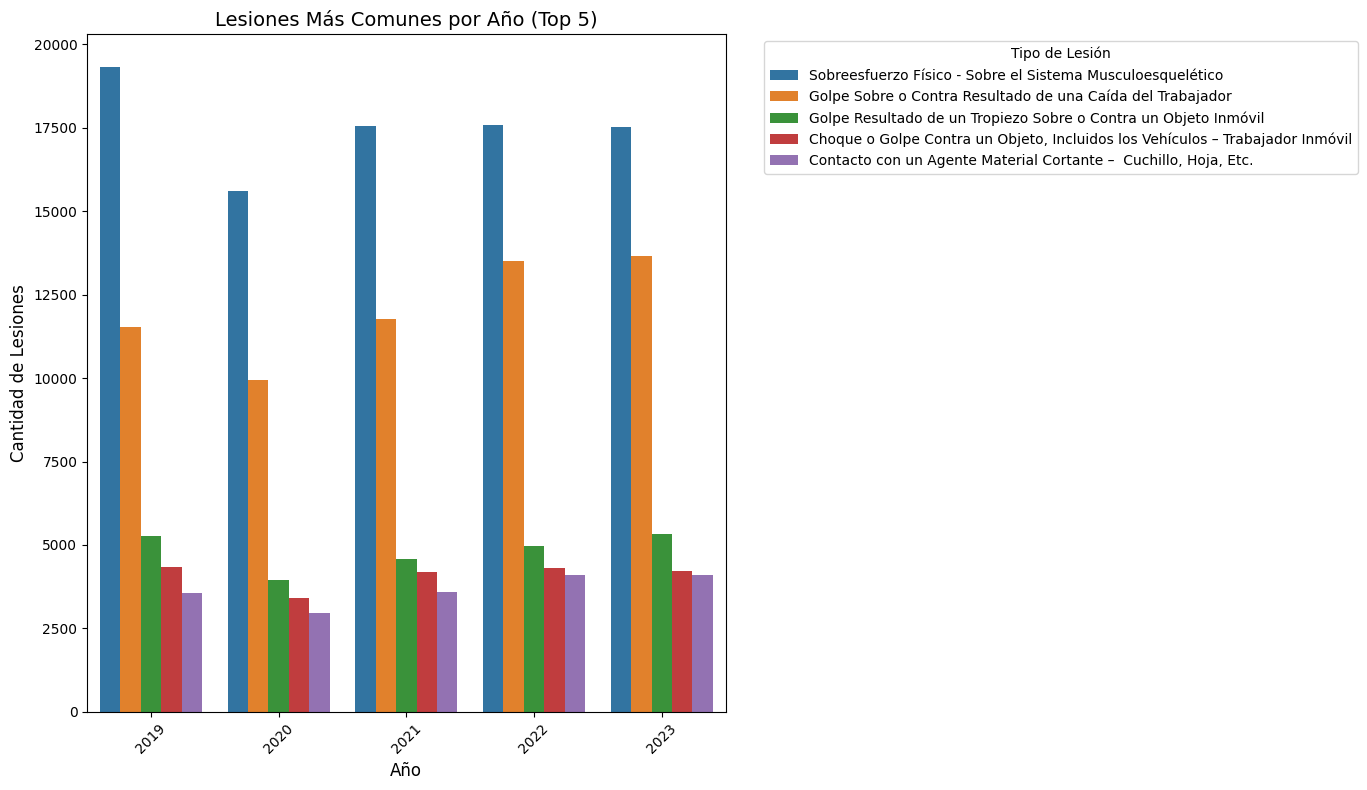

In [28]:
# Filtrar para mostrar solo las lesiones más comunes de cada año (top 5 por año)
top_accidente_anyo = accidente_comun_anyo.groupby("ANYO").head(5)

# Crear un gráfico de barras apiladas para visualizar las lesiones más comunes por año
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_accidente_anyo,
    x="ANYO",
    y="TOTAL",
    hue="FORMA_LESIÓN",
    errorbar=None
)

# Configuración del gráfico
plt.title("Lesiones Más Comunes por Año (Top 5)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Cantidad de Lesiones", fontsize=12)
plt.legend(title="Tipo de Lesión", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h1>Gráfico 12 (Accidentes mas letales)

In [30]:
# Filtrar los datos para seleccionar solo los accidentes mortales
accidentes_mortales = cv_total[cv_total['GRAVEDAD'].str.contains('Mortal', na=False)]

# Agrupar por año, tipo de accidente y forma de lesión, contando los accidentes mortales
accidentes_mas_letales = accidentes_mortales.groupby(['ANYO', 'TIPO_DE_ACCIDENTE', 'FORMA_LESIÓN']).size().reset_index(name='TOTAL_MORTALES')

# Seleccionar el tipo de accidente más letal por año
accidentes_mas_letales_por_anyo = accidentes_mas_letales.loc[
    accidentes_mas_letales.groupby('ANYO')['TOTAL_MORTALES'].idxmax()
]

# Mostrar el DataFrame resultante
accidentes_mas_letales_por_anyo

,ANYO,TIPO_DE_ACCIDENTE,FORMA_LESIÓN,TOTAL_MORTALES
0,2019,No Traumáticos,"Infartos, Derrames Cerebrales y Otras Patologí...",26
24,2020,No Traumáticos,"Infartos, Derrames Cerebrales y Otras Patologí...",22
46,2021,No Traumáticos,"Infartos, Derrames Cerebrales y Otras Patologí...",21
63,2022,No Traumáticos,"Infartos, Derrames Cerebrales y Otras Patologí...",27
86,2023,No Traumáticos,"Infartos, Derrames Cerebrales y Otras Patologí...",22


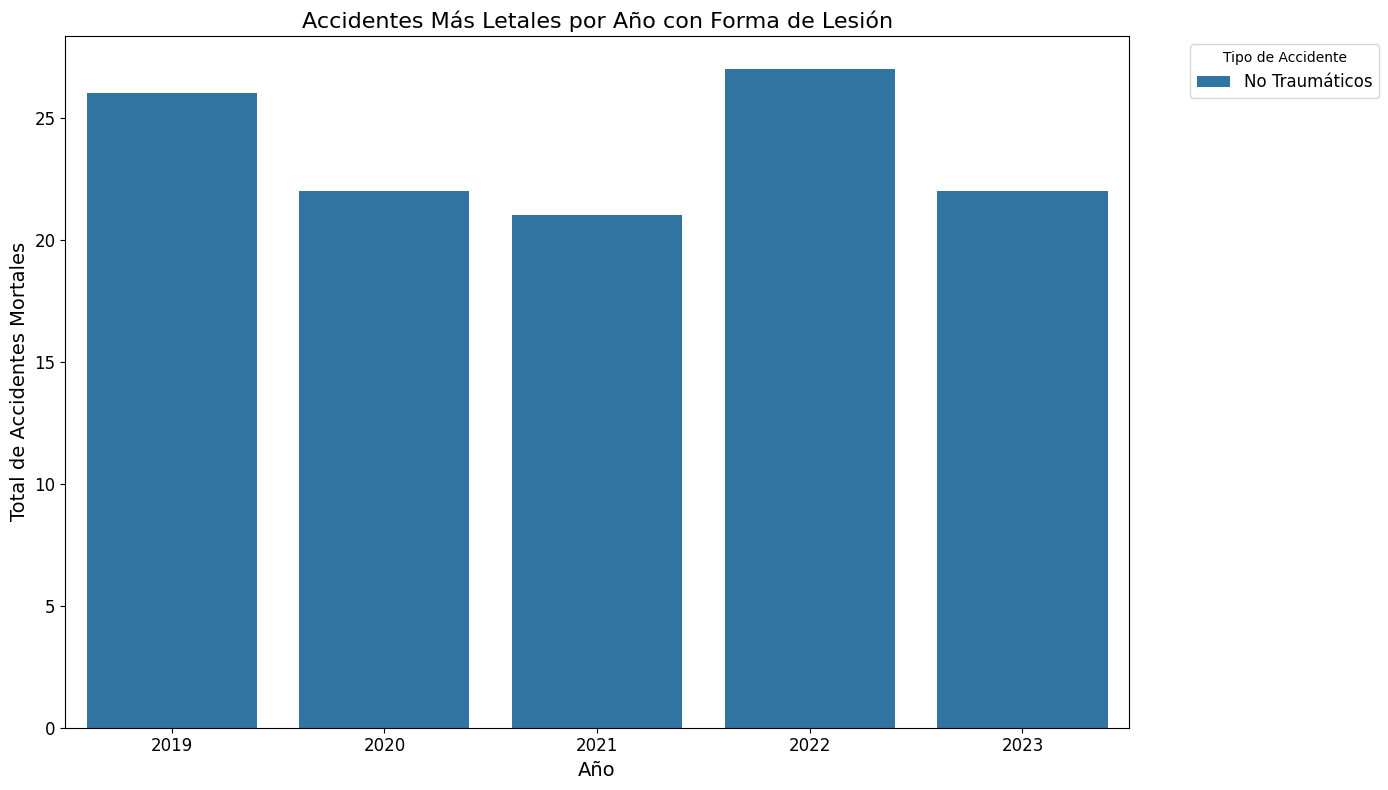

In [ ]:
# Crear un gráfico de barras para visualizar los accidentes más letales por año
plt.figure(figsize=(14, 8))

# Generar el gráfico de barras
sns.barplot(
    data=accidentes_mas_letales_por_anyo,
    x="ANYO",
    y="TOTAL_MORTALES",
    hue="TIPO_DE_ACCIDENTE",
    dodge=False
)

# Configuración del gráfico
plt.title("Accidentes Más Letales por Año con Forma de Lesión", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Total de Accidentes Mortales", fontsize=14)
plt.legend(title="Tipo de Accidente", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h1>Gráfico 13 (Accidentes por división)

In [ ]:
# Agrupar los datos por año y división (CNAE_DIVISIÓN), contando las bajas totales
bajas_por_division_anyo = cv_total.groupby(['ANYO', 'CNAE_DIVISIÓN']).size().reset_index(name='TOTAL_BAJAS')

# Obtener el top 5 de divisiones con más bajas para cada año
top_5_divisiones_anyo = bajas_por_division_anyo.groupby('ANYO').apply(lambda x: x.nlargest(5, 'TOTAL_BAJAS')).reset_index(drop=True)

# Mostrar el DataFrame resultante
top_5_divisiones_anyo

/var/folders/5z/c5093s6s66s0f5vcgl4mnfnh0000gn/T/ipykernel_16629/659442340.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_divisiones_anyo = bajas_por_division_anyo.groupby('ANYO').apply(lambda x: x.nlargest(5, 'TOTAL_BAJAS')).reset_index(drop=True)


,ANYO,CNAE_DIVISIÓN,TOTAL_BAJAS
0,2019,Servicios de comidas y bebidas,5097
1,2019,Actividades de construcción especializada,4394
2,2019,"Comercio al por menor, excepto de vehículos de...",4128
3,2019,Comercio al por mayor e intermediarios del com...,4123
4,2019,Construcción de edificios,3414
5,2020,Actividades de construcción especializada,3856
6,2020,"Comercio al por menor, excepto de vehículos de...",3427
7,2020,Comercio al por mayor e intermediarios del com...,3416
8,2020,Actividades sanitarias,3414
9,2020,Servicios de comidas y bebidas,3305


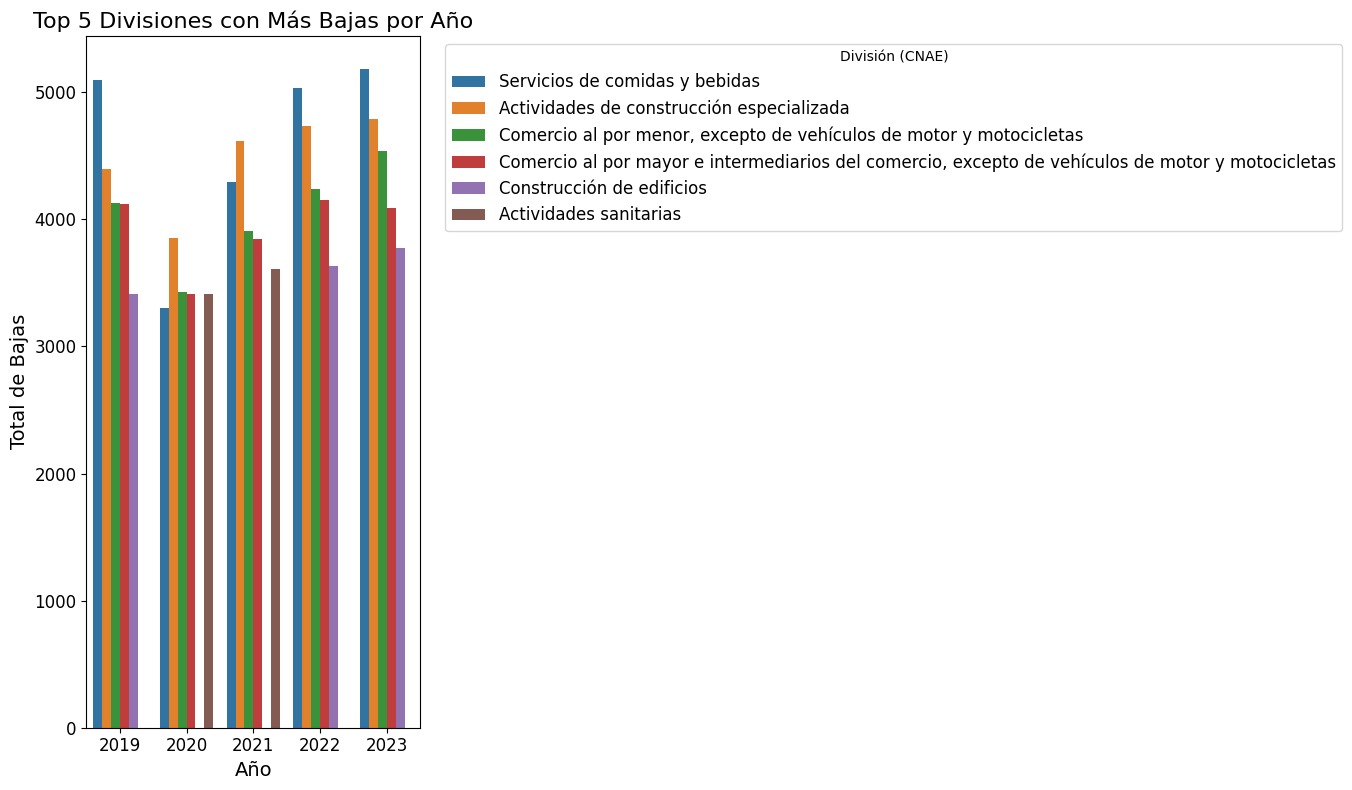

In [ ]:
# Crear un gráfico de barras apiladas para el top 5 de divisiones con más bajas por año
plt.figure(figsize=(14, 8))

# Configurar el gráfico para las divisiones principales
sns.barplot(
    data=top_5_divisiones_anyo,
    x="ANYO",
    y="TOTAL_BAJAS",
    hue="CNAE_DIVISIÓN",
    dodge=True
)

# Configuración del gráfico
plt.title("Top 5 Divisiones con Más Bajas por Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Total de Bajas", fontsize=14)
plt.legend(title="División (CNAE)", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h2>Lugares mas peligrosos

<h1>Gráfico 14 (Lugar donde ocurren mas accidentes)

In [ ]:
# Agrupar los datos por año y lugar, y contar los accidentes
lugares_comunes_anyo = cv_total.groupby(['ANYO', 'LUGAR']).size().reset_index(name='TOTAL')

# Obtener el top 10 de lugares con más accidentes por año
lugares_top_10_anyo = lugares_comunes_anyo.groupby('ANYO').apply(lambda x: x.nlargest(10, 'TOTAL')).reset_index(drop=True)

# Mostrar el DataFrame resultante
lugares_top_10_anyo

/var/folders/5z/c5093s6s66s0f5vcgl4mnfnh0000gn/T/ipykernel_16629/1307699692.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lugares_top_10_anyo = lugares_comunes_anyo.groupby('ANYO').apply(lambda x: x.nlargest(10, 'TOTAL')).reset_index(drop=True)


,ANYO,LUGAR,TOTAL
0,2019,Accidentes en Jornada de Trabajo,53157
1,2019,Accidentes in Itinere,8123
2,2020,Accidentes en Jornada de Trabajo,45577
3,2020,Accidentes in Itinere,6170
4,2021,Accidentes en Jornada de Trabajo,52304
5,2021,Accidentes in Itinere,7634
6,2022,Accidentes en Jornada de Trabajo,54841
7,2022,Accidentes in Itinere,8661
8,2023,Accidentes en Jornada de Trabajo,54327
9,2023,Accidentes in Itinere,9270


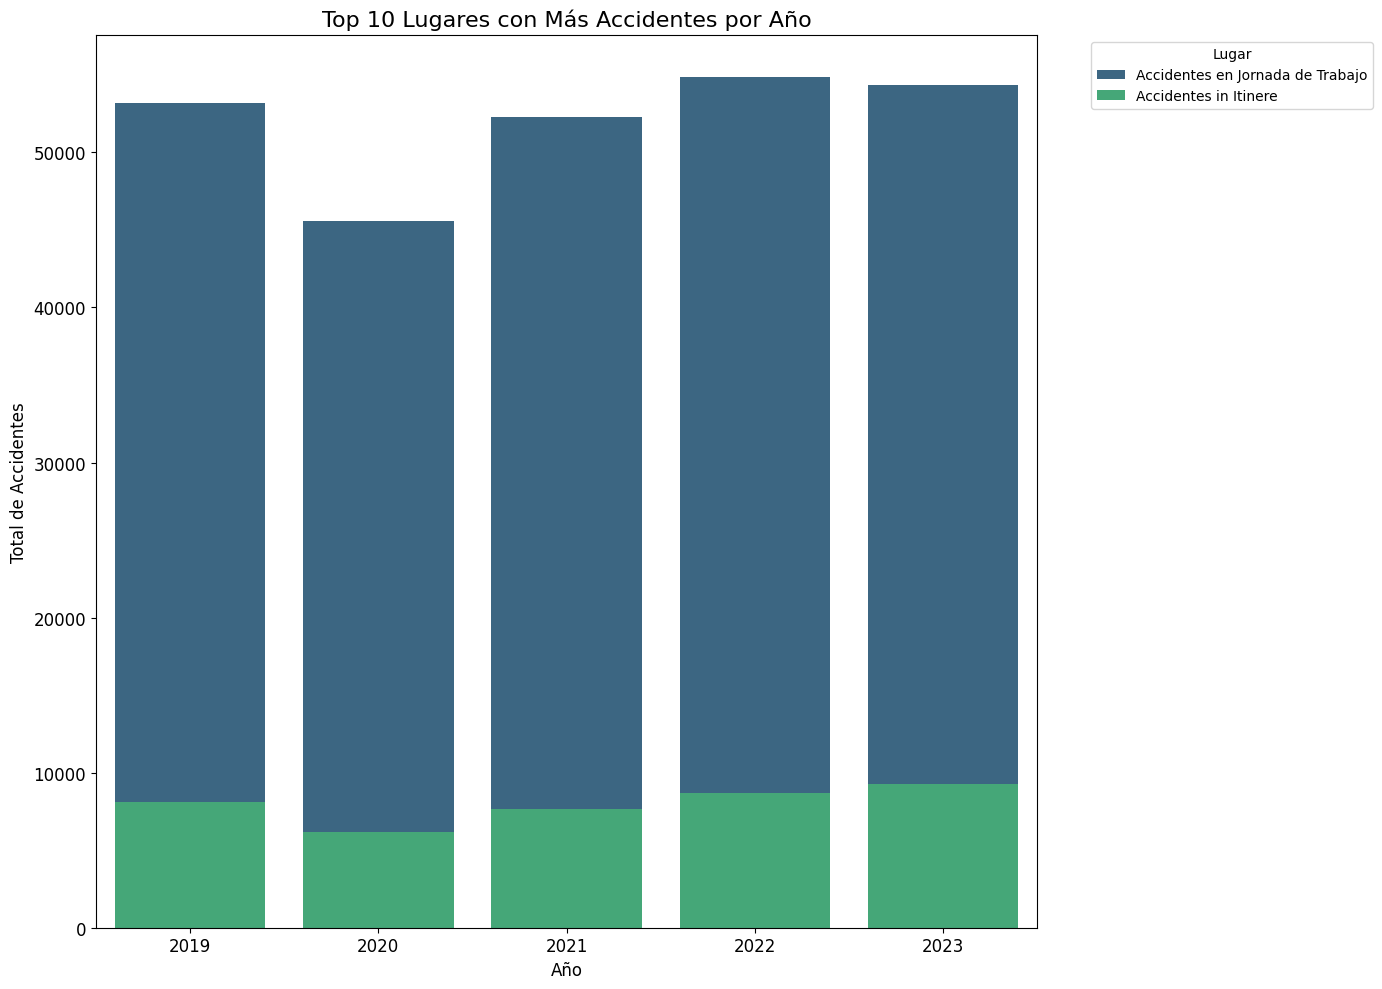

In [ ]:
# Crear un gráfico de barras apiladas para visualizar los lugares con más accidentes por año
plt.figure(figsize=(14, 10))

sns.barplot(
    data=lugares_top_10_anyo,
    x='ANYO',
    y='TOTAL',
    hue='LUGAR',
    dodge=False,
    palette='viridis'
)

# Configuración del gráfico
plt.title('Top 10 Lugares con Más Accidentes por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Accidentes', fontsize=12)
plt.legend(title='Lugar', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h1>Gráfico 15 (En que sectores ocurren esos accidentes)

In [ ]:
# Filtrar los datos originales para obtener las divisiones relacionadas con el DataFrame "lugares_top_10_anyo"
divisiones_accidentes_top_lugares = cv_total.merge(
    lugares_top_10_anyo,
    on=['ANYO', 'LUGAR'],
    how='inner'
)

# Agrupar los datos por año, división y lugar, contando los accidentes
divisiones_lugares_agrupadas = divisiones_accidentes_top_lugares.groupby(['ANYO', 'CNAE_DIVISIÓN', 'LUGAR']).size().reset_index(name='TOTAL')

# Ordenar por año y total de accidentes
divisiones_lugares_agrupadas = divisiones_lugares_agrupadas.sort_values(by=['ANYO', 'TOTAL'], ascending=[True, False])

# Mostrar el resultado
divisiones_lugares_agrupadas

# Obtener el top 5 de divisiones con más accidentes por año
top_5_divisiones_lugares_anyo = divisiones_lugares_agrupadas.groupby('ANYO').apply(lambda x: x.nlargest(5, 'TOTAL')).reset_index(drop=True)

# Mostrar el DataFrame resultante
top_5_divisiones_lugares_anyo

/var/folders/5z/c5093s6s66s0f5vcgl4mnfnh0000gn/T/ipykernel_16629/1241616103.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_divisiones_lugares_anyo = divisiones_lugares_agrupadas.groupby('ANYO').apply(lambda x: x.nlargest(5, 'TOTAL')).reset_index(drop=True)


,ANYO,CNAE_DIVISIÓN,LUGAR,TOTAL
0,2019,Servicios de comidas y bebidas,Accidentes en Jornada de Trabajo,4172
1,2019,Actividades de construcción especializada,Accidentes en Jornada de Trabajo,4151
2,2019,Comercio al por mayor e intermediarios del com...,Accidentes en Jornada de Trabajo,3632
3,2019,Construcción de edificios,Accidentes en Jornada de Trabajo,3270
4,2019,"Comercio al por menor, excepto de vehículos de...",Accidentes en Jornada de Trabajo,3219
5,2020,Actividades de construcción especializada,Accidentes en Jornada de Trabajo,3689
6,2020,Comercio al por mayor e intermediarios del com...,Accidentes en Jornada de Trabajo,3041
7,2020,Construcción de edificios,Accidentes en Jornada de Trabajo,2944
8,2020,Actividades sanitarias,Accidentes en Jornada de Trabajo,2860
9,2020,"Agricultura, ganadería, caza y servicios relac...",Accidentes en Jornada de Trabajo,2791


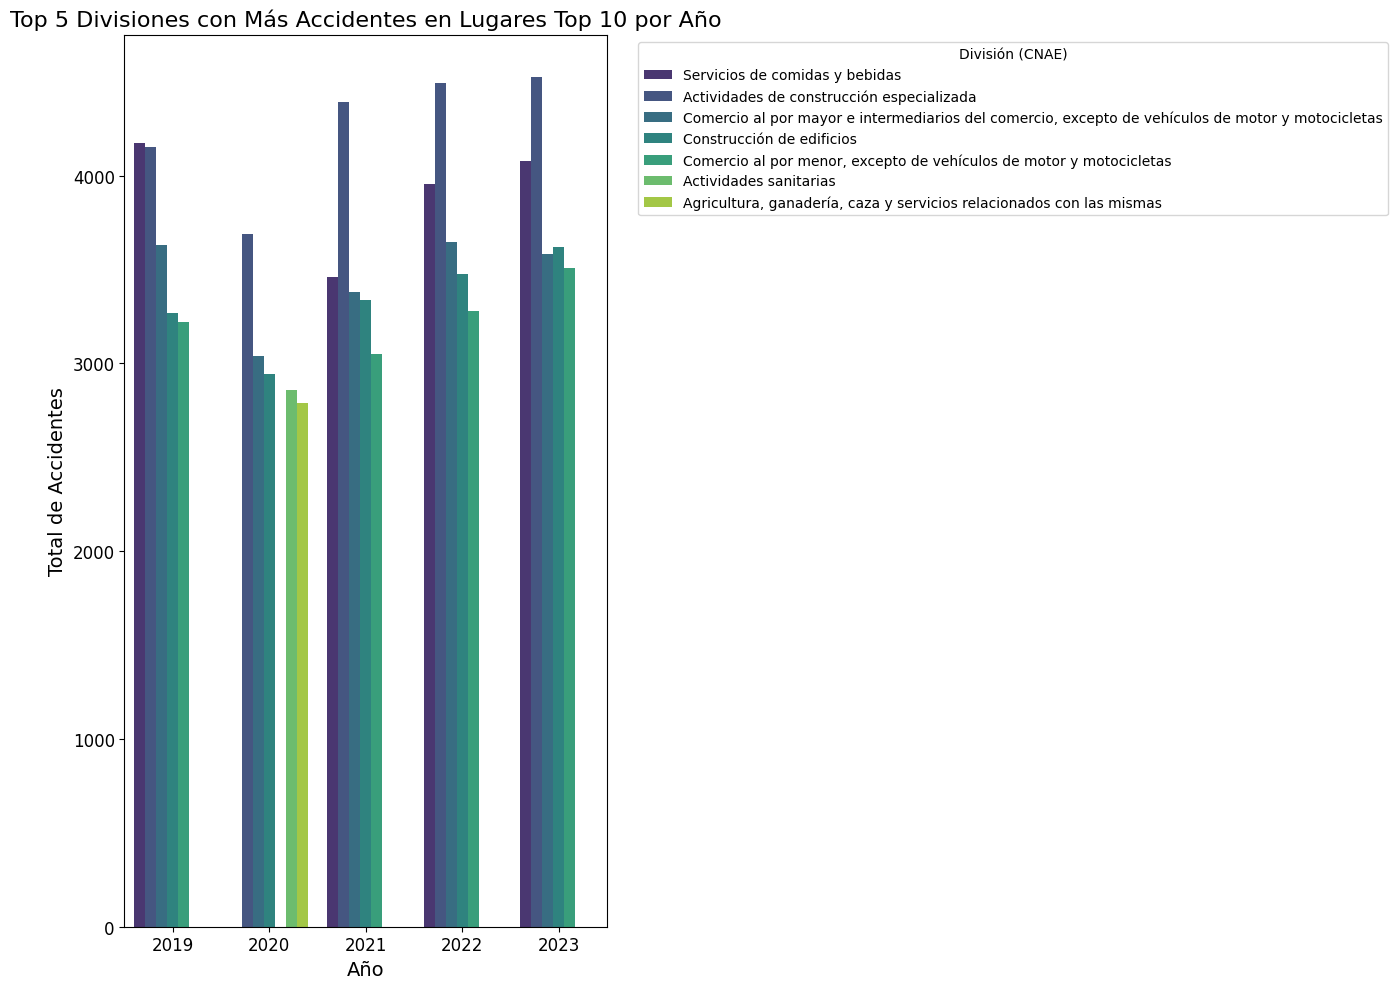

In [ ]:
# Crear un gráfico de barras apiladas para el top 5 de divisiones con más accidentes por año
plt.figure(figsize=(14, 10))

# Generar el gráfico
sns.barplot(
    data=top_5_divisiones_lugares_anyo,
    x="ANYO",
    y="TOTAL",
    hue="CNAE_DIVISIÓN",
    dodge=True,
    palette="viridis"
)

# Configuración del gráfico
plt.title("Top 5 Divisiones con Más Accidentes en Lugares Top 10 por Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Total de Accidentes", fontsize=14)
plt.legend(title="División (CNAE)", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h1>Gráfico 16 (En que provincia ocurren mas accidentes)

In [ ]:
# Agrupar los datos por año y provincia, y contar los accidentes
accidentes_por_provincia_anyo = cv_total.groupby(['ANYO', 'PROVINCIA']).size().reset_index(name='TOTAL')

# Filtrar las provincias específicas: Valencia, Alicante y Castellón
todas_provincias_comparativa = accidentes_por_provincia_anyo[
    accidentes_por_provincia_anyo['PROVINCIA'].isin(['Valencia/València', 'Alicante/Alacant', 'Castellón/Castelló'])
]

# Mostrar el DataFrame resultante
todas_provincias_comparativa

,ANYO,PROVINCIA,TOTAL
0,2019,Alicante/Alacant,19649
1,2019,Castellón/Castelló,8483
2,2019,Valencia/València,33148
3,2020,Alicante/Alacant,15606
4,2020,Castellón/Castelló,7201
5,2020,Valencia/València,28940
6,2021,Alicante/Alacant,18056
7,2021,Castellón/Castelló,8720
8,2021,Valencia/València,33162
9,2022,Alicante/Alacant,19520


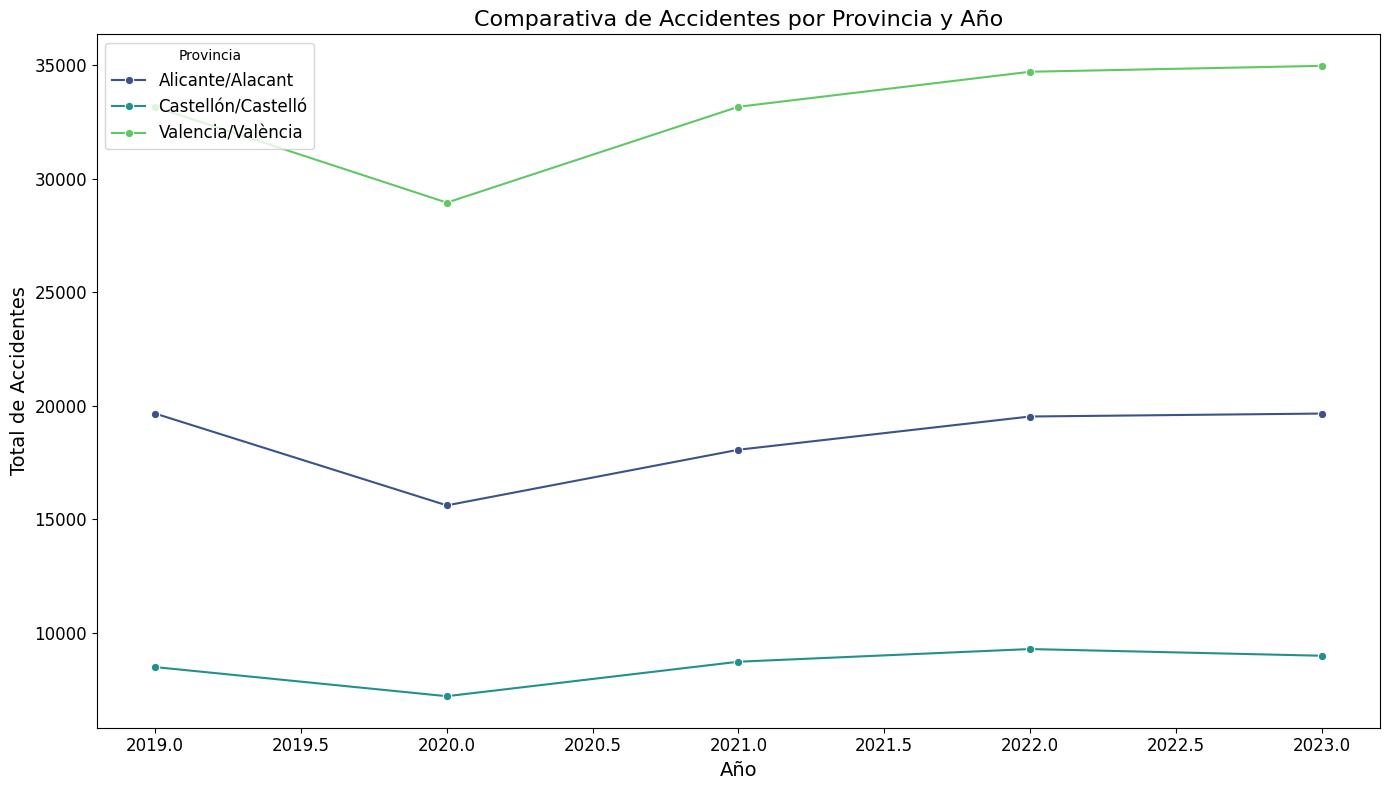

In [ ]:
# Crear un gráfico de líneas para comparar los accidentes en Valencia, Alicante y Castellón por año
plt.figure(figsize=(14, 8))

# Generar el gráfico
sns.lineplot(
    data=todas_provincias_comparativa,
    x="ANYO",
    y="TOTAL",
    hue="PROVINCIA",
    marker="o",
    palette="viridis"
)

# Configuración del gráfico
plt.title("Comparativa de Accidentes por Provincia y Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Total de Accidentes", fontsize=14)
plt.legend(title="Provincia", fontsize=12, loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()